## Importing and Initialising Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import montage
from skimage import io
from skimage.transform import rotate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Loads PartA and PartB datasets
PartA = pd.read_csv("partA.csv")

PartB = pd.read_csv("partB.csv")

#Load the cross-validation datasets
new_input_dataset = pd.read_csv("new_input_data.csv")
new_output_dataset = pd.read_csv("new_output_data.csv")

#Separates input and output columns
input_cols = [col for col in PartA.columns if col.startswith('in_')]
output_cols = [col for col in PartA.columns if col.startswith('out_')]

X = PartA[input_cols]
y = PartA[output_cols]

#Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Section A Part A Q1 (Decision Tree MSE)


----Results----
Testing MSE at a depth of 6: 0.1776987603249208 at a depth of 6





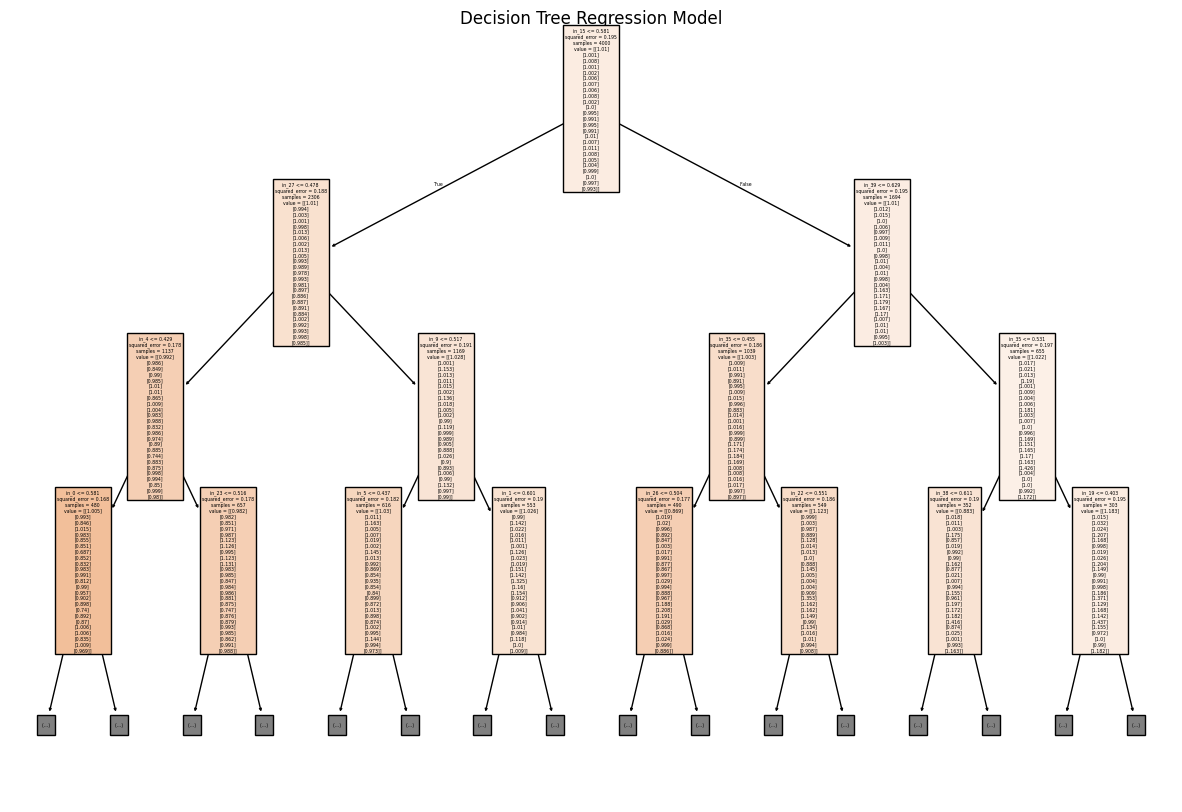

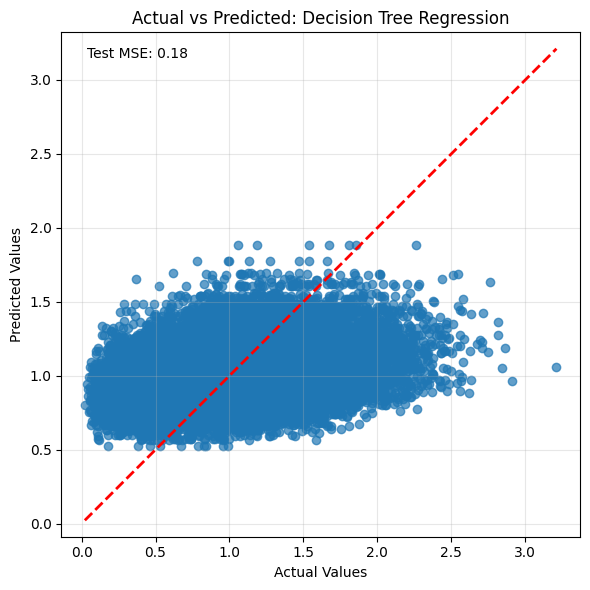

In [2]:
#Initialises Decision Tree
dt_model = DecisionTreeRegressor(
    max_depth=6,  # Limits tree depth
    min_samples_split=5,  # Minimum samples required to split a node
    min_samples_leaf=2,  # Minimum samples required at a leaf node
    random_state=42
)

#Fits training data into model
dt_model.fit(X_train, y_train)

#Makes predictions
y_test_pred_dt = dt_model.predict(X_test)


#Calculates MSE
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
print("----Results----")
print(f"Testing MSE at a depth of 6: {test_mse_dt} at a depth of 6\n\n\n")


#Visualization of the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=input_cols, filled=True, max_depth=3)
plt.title('Decision Tree Regression Model')
plt.show()

#Creates the figure
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred_dt, alpha=0.7)

#Add a perfect prediction line
max_value = max(np.max(y_test), np.max(y_test_pred_dt))
min_value = min(np.min(y_test), np.min(y_test_pred_dt))
diagonal = np.linspace(min_value, max_value, 100)
plt.plot(diagonal, diagonal, 'r--', linewidth=2)

#Adds labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Decision Tree Regression')

#Adds MSE as text annotation
plt.annotate(f'Test MSE: {test_mse_dt:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Section A Part A Q2 (MLP MSE)

MLP - Training MSE: 0.01842109474056591
MLP - Testing MSE: 0.021758691453873477


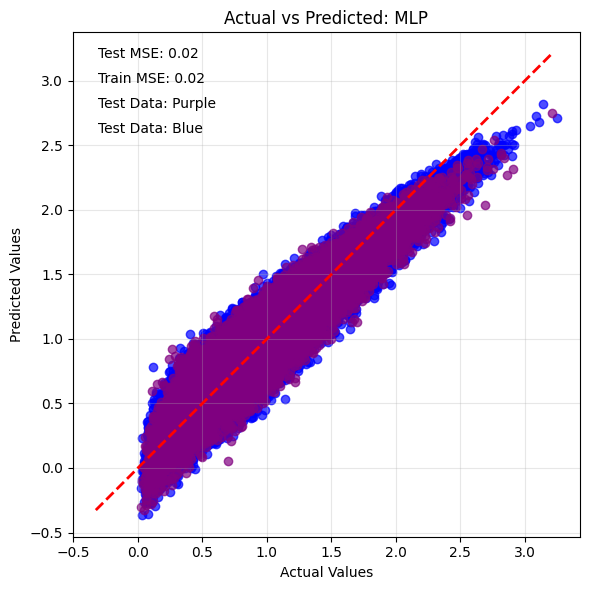

In [3]:
#Initialises Neural Network
mlp_model = MLPRegressor(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42)

#Fits training data into model
mlp_model.fit(X_train, y_train)

#Makes predictions
y_train_pred_mlp = mlp_model.predict(X_train)
y_test_pred_mlp = mlp_model.predict(X_test)

#Calculates MSE
train_mse_mlp = mean_squared_error(y_train, y_train_pred_mlp)
test_mse_mlp = mean_squared_error(y_test, y_test_pred_mlp)

print(f"MLP - Training MSE: {train_mse_mlp}")
print(f"MLP - Testing MSE: {test_mse_mlp}")

#Creates the figure
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_train_pred_mlp, color='blue', alpha=0.7)
plt.scatter(y_test, y_test_pred_mlp, color='purple', alpha=0.7)


#Adds a perfect prediction line
max_value = max(np.max(y_test), np.max(y_test_pred_mlp))
min_value = min(np.min(y_test), np.min(y_test_pred_mlp))
diagonal = np.linspace(min_value, max_value, 100)
plt.plot(diagonal, diagonal, 'r--', linewidth=2)

#Adds labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: MLP')

#Adds MSE as text annotation
plt.annotate(f'Test MSE: {test_mse_mlp:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.annotate(f'Train MSE: {train_mse_mlp:.2f}', xy=(0.05, 0.90), xycoords='axes fraction')
plt.annotate(f'Test Data: Purple', xy=(0.05, 0.85), xycoords='axes fraction')
plt.annotate(f'Test Data: Blue', xy=(0.05, 0.80), xycoords='axes fraction')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()


## Section A Part A Q3 (K-Fold MSE for DT and MLP)

Decision Tree - CV MSE scores: [0.07633951659420263, 0.07529899670365969, 0.07358797008332477, 0.07364006223369576, 0.07428245352567836, 0.07616678155574878, 0.07126814065409423, 0.0747884470673092, 0.07386087872408115, 0.07394761853295756]
Decision Tree - Average CV MSE: 0.07431808656747521
MLP - CV MSE scores: [0.0027151509028337214, 0.002578545953787255, 0.0026116344119929574, 0.0026922889129040463, 0.0025213279682580274, 0.0025992727853667136, 0.002601861512318206, 0.0025300261120278465, 0.0028501008985933733, 0.002591328295540699]
MLP - Average CV MSE: 0.0026291537753622848


C:\ghcup\temp\ipykernel_13556\2092590669.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dt_cv_scores, mlp_cv_scores], labels=['Decision Tree', 'MLP'])


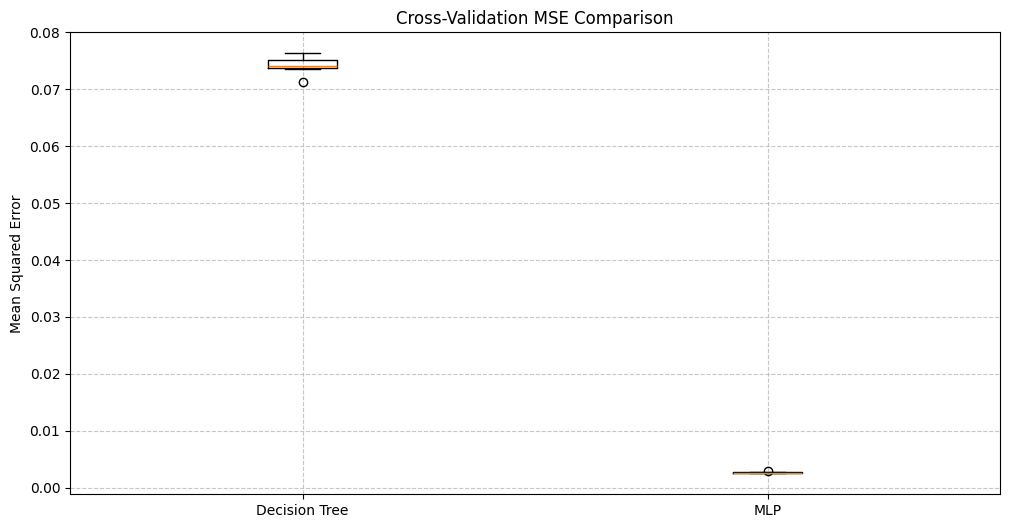

In [4]:
#Creates a wrapper for Decision Tree
dt_wrapper = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))

#Creates a wrapper for MLP
mlp_wrapper = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42))

#Sets up 10-fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

#Function to calculate MSE for each fold
def cross_validate_model(model, X, y, cv):
    mse_scores = []
    for train_idx, test_idx in cv.split(X):
        X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
        y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]
        
        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        
        mse = mean_squared_error(y_test_cv, y_pred)
        mse_scores.append(mse)
    
    return mse_scores

#Combines input and output datasets for cross-validation
X_cv = pd.concat([X, new_input_dataset])
y_cv = pd.concat([y, new_output_dataset])

#Cross-validates Decision Tree
dt_cv_scores = cross_validate_model(dt_wrapper, X_cv, y_cv, kf)
print(f"Decision Tree - CV MSE scores: {dt_cv_scores}")
print(f"Decision Tree - Average CV MSE: {np.mean(dt_cv_scores)}")

#Cross-validates MLP
mlp_cv_scores = cross_validate_model(mlp_wrapper, X_cv, y_cv, kf)
print(f"MLP - CV MSE scores: {mlp_cv_scores}")
print(f"MLP - Average CV MSE: {np.mean(mlp_cv_scores)}")

#Plot comparison of cross-validation results
plt.figure(figsize=(12, 6))
plt.boxplot([dt_cv_scores, mlp_cv_scores], labels=['Decision Tree', 'MLP'])
plt.title('Cross-Validation MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Section A Part B (Image Slicing)

In [5]:
#Loads Group_J.png
Group_J = io.imread(r"C:\Users\User\Downloads\Dataset\Section A\Images\Group_J.png")

#Function to extract a letter from the grid
def extract_letter(row, col):
    top = row * cell_height + 18
    bottom = (row + 1) * cell_height - 18
    left = col * cell_width + 18
    right = (col + 1) * cell_width - 18
    
    return Group_J[top:bottom, left:right]


#Function to extract and optionally rotate a letter
def extract_letter_with_rotation(row, col, angle):
    #Extracts the letter first
    letter_img = extract_letter(row, col)

    #Rotates the letter according to angle
    if angle != 0:
        letter_img = rotate(letter_img, angle, resize=False, mode='edge', preserve_range=True)
        letter_img = letter_img.astype(Group_J.dtype)
    
    return letter_img


#Displays Group_J.png
plt.figure(figsize=(10, 8))
plt.imshow(Group_J)
plt.title('Group J')
plt.axis('off')
plt.show()

num_rows = 6
num_cols = 9

#Calculate the height and width of each cell
cell_height = (Group_J.shape[0] // num_rows)
cell_width = (Group_J.shape[1] // num_cols)

print("My name is Jeffrey Teoh Dass, and I am slicing the image Group_J.png to extract my name\n\n")

#First name cords and label
first_name = "Jeffrey"
first_name_coords = [(1, 8, 30), (1, 0, 22), (2, 3, 5), (2, 3, 5), (5, 2, 9), (1, 0, 22), (4, 4, 30)]  # Example coordinates for A, d, a, m

#Extracts letters for first name
first_name_letters = [extract_letter_with_rotation(row, col, angle) for row, col, angle in first_name_coords]


#Combines letters into a single image
first_name_image = np.hstack(first_name_letters)

#Displays first name
plt.figure(figsize=(len(first_name) * 2, 2))
plt.imshow(first_name_image)
plt.title(f'First Name: {first_name.capitalize()}')
plt.axis('off')
plt.show()

#Middle name cords and label
middle_name = "Teoh"
middle_name_coords = [(4, 0, -12), (1, 0, 22), (1, 6, 0), (0, 7, 30)]  # Example coordinates for S, m, i, t, h

#Extracts letters for middle name
middle_name_letters = [extract_letter_with_rotation(row, col, angle) for row, col, angle in middle_name_coords]

#Combines letters into a single image
middle_name_image = np.hstack(middle_name_letters)

#Displays middle name
plt.figure(figsize=(len(middle_name) * 2, 2))
plt.imshow(middle_name_image)
plt.title(f'Middle Name: {middle_name.capitalize()}')
plt.axis('off')
plt.show()

#Last name cords and label
last_name = "Dass"
last_name_coords = [(4, 6, -18), (2, 7, -3), (1, 1, 20), (1, 1, 20)]  # Example coordinates for S, m, i, t, h

#Extracts letters for last name
last_name_letters = [extract_letter_with_rotation(row, col, angle) for row, col, angle in last_name_coords]

#Combines letters into a single image
last_name_image = np.hstack(last_name_letters)

#Displays last name
plt.figure(figsize=(len(last_name) * 2, 2))
plt.imshow(last_name_image)
plt.title(f'Last Name: {last_name.capitalize()}')
plt.axis('off')
plt.show()

FileNotFoundError: No such file: 'C:\Users\User\Downloads\Dataset\Section A\Images\Group_J.png'

## Section B Q1 (Linear Regression Model)

In [ ]:
#Initialsing linear regression data
X_lr = PartB[['Weather Conditions', 'Road Surface', 'Lighting Conditions']]
y_lr = PartB['Number of Males'] + PartB['Number of Females']

#Creates a preprocessor
preprocessor_lr = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), [0, 1, 2])  # All three columns are categorical
    ])

#Creates a new pipeline with LRRegressor
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('regressor', LinearRegression())
])

#Splits the data
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

#Fits the model with training data
lr_pipeline.fit(X_lr_train, y_lr_train)

#Makes predictions
y_pred_lr = lr_pipeline.predict(X_lr_test)


#Calculates MSE
mse = mean_squared_error(y_lr_test, y_pred_lr)
print("----Results----")
print(f"Mean Squared Error: {mse}\n\n\n")

#Creates the figure
plt.figure(figsize=(6, 6))
plt.scatter(y_lr_test, y_pred_lr, alpha=0.7)

# Add a perfect prediction line
max_value = max(max(y_lr_test), max(y_pred_lr))
min_value = min(min(y_lr_test), min(y_pred_lr))
diagonal = np.linspace(min_value, max_value, 100)
plt.plot(diagonal, diagonal, 'r--', linewidth=2)

#Adds labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Linear Regression for Total Casualties')

#Adds MSE as text annotation
plt.annotate(f'MSE: {mse:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()



## Summary

This is a linear regression model that uses the weather condition, road surface, and lighting conditions to predict the total number of casualties, This model got an MSE score of 2.486 (4 s.i.).

## Section B Q2 (Decision Tree Model)

In [ ]:
#Initialsing decision tree data
X_dt = PartB[['Weather Conditions', 'Road Surface', 'Lighting Conditions', 'Type of Vehicle', '1st Road Class']]
y_dt = PartB['Number of Males'] + PartB['Number of Females']

#Creates a preprocessor
preprocessor_dt = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), [0, 1, 2, 3, 4])  # All four columns are categorical
    ])

#Creates a new pipeline with DTRegressor
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor_dt),  # Use the same preprocessor you already defined
    ('regressor', DecisionTreeRegressor(max_depth=6, random_state=42))  
])

#Splits the data
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

#Fits the model with training data
dt_pipeline.fit(X_dt_train, y_dt_train)

#Makes predictions
y_pred_dt = dt_pipeline.predict(X_dt_test)


#Calculates MSE
mse_dt = mean_squared_error(y_dt_test, y_pred_dt)
print("----Results----")
print(f"Decision Tree Mean Squared Error: {mse_dt}\n\n\n")

#Creates the figure
plt.figure(figsize=(6, 6))
plt.scatter(y_dt_test, y_pred_dt, alpha=0.7)

#Add a perfect prediction line
max_value = max(max(y_dt_test), max(y_pred_dt))
min_value = min(min(y_dt_test), min(y_pred_dt))
diagonal = np.linspace(min_value, max_value, 100)
plt.plot(diagonal, diagonal, 'r--', linewidth=2)

#Adds labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Decision Tree for Total Casualties')

#Add MSE as text annotation
plt.annotate(f'MSE: {mse_dt:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Summary

This is a Decision Tree model that uses the weather condition, road surface, and lighting conditions, type of vehicle, and 1st Road Class to predict the total number of casualties, This model got an MSE score of 2.150 (4 s.i.).

## Section B Q3 (Neural Network Model)


In [ ]:
#Initialsing Neural Network data
X_nn = PartB[['Weather Conditions', 'Road Surface', '1st Road Class', 'Type of Vehicle', 'Lighting Conditions']]
y_nn = PartB['Number of Males'] + PartB['Number of Females']

#Creates a preprocessor
preprocessor_nn = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), [0, 1, 2, 3, 4])  # All five columns are categorical
    ])

#Creates a new pipeline with MLPRegressor
nn_pipeline = Pipeline([
    ('preprocessor', preprocessor_nn),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
])

#Splits the data
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

#Fits the model with training data
nn_pipeline.fit(X_nn_train, y_nn_train)

#Makes predictions
y_pred_nn = nn_pipeline.predict(X_nn_test)

#Calculates MSE
mse_nn = mean_squared_error(y_nn_test, y_pred_nn)
print("----Results----")
print(f"Neural Network Mean Squared Error: {mse_nn}\n\n\n")

#Creates the figure
plt.figure(figsize=(6, 6))
plt.scatter(y_nn_test, y_pred_nn, alpha=0.7)

#Addd a perfect prediction line
max_value = max(max(y_nn_test), max(y_pred_nn))
min_value = min(min(y_nn_test), min(y_pred_nn))
diagonal = np.linspace(min_value, max_value, 100)
plt.plot(diagonal, diagonal, 'r--', linewidth=2)

#Adds labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Neural Network for Total Casualties')

#Adds MSE as text annotation
plt.annotate(f'MSE: {mse_nn:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Summary

This is a Neural Network model that uses the weather condition, road surface, and lighting conditions, type of vehicle, and 1st Road Class to predict the total number of casualties, This model got an MSE score of 2.150 (4 s.i.).

## Section B Q4 (K-Fold: Cross Validation 10 folds)

In [ ]:
#Sets up 10-fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

preprocessor_lr = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [0, 1, 2])  # Added handle_unknown='ignore'
    ])
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('regressor', LinearRegression())
])

#Linear Regression Cross-Validation
lr_cv_scores = cross_val_score(
    lr_pipeline, 
    X_lr, 
    y_lr, 
    cv=kf, 
    scoring='neg_mean_squared_error'
)
#Converts negative MSE to positive MSE and calculate mean
lr_cv_mse = -lr_cv_scores.mean()
print("----Results----")
print(f"Linear Regression 10-Fold CV Mean MSE: {lr_cv_mse}")
print(f"Linear Regression 10-Fold CV MSE Scores: {-lr_cv_scores}\n\n")

preprocessor_dt = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [0, 1, 2, 3, 4])  # Added handle_unknown='ignore'
    ])
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor_dt),
    ('regressor', DecisionTreeRegressor(max_depth=6, random_state=42))
])

#Decision Tree Cross-Validation
dt_cv_scores = cross_val_score(
    dt_pipeline, 
    X_dt, 
    y_dt, 
    cv=kf, 
    scoring='neg_mean_squared_error'
)
#Converts negative MSE to positive MSE and calculate mean
dt_cv_mse = -dt_cv_scores.mean()
print(f"Decision Tree 10-Fold CV Mean MSE: {dt_cv_mse}")
print(f"Decision Tree 10-Fold CV MSE Scores: {-dt_cv_scores}\n\n")


preprocessor_nn = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [0, 1, 2, 3, 4])  # Added handle_unknown='ignore'
    ])
nn_pipeline = Pipeline([
    ('preprocessor', preprocessor_nn),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
])

#Neural Network Cross-Validation
nn_cv_scores = cross_val_score(
    nn_pipeline, 
    X_nn, 
    y_nn, 
    cv=kf, 
    scoring='neg_mean_squared_error'
)

#Converts negative MSE to positive MSE and calculate mean
nn_cv_mse = -nn_cv_scores.mean()
print(f"Neural Network 10-Fold CV Mean MSE: {nn_cv_mse}")
print(f"Neural Network 10-Fold CV MSE Scores: {-nn_cv_scores}\n\n")


#Initialises figure
fig, (ax1) = plt.subplots(1, figsize=(16, 6))

#Prepares data
model_names = ['Linear Regression', 'Decision Tree', 'Neural Network']
mean_mse_values = [lr_cv_mse, dt_cv_mse, nn_cv_mse]
all_mse_scores = pd.DataFrame({
    'Linear Regression': -lr_cv_scores,
    'Decision Tree': -dt_cv_scores,
    'Neural Network': -nn_cv_scores
})

#Adds Bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars = ax1.bar(model_names, mean_mse_values, color=colors, alpha=0.7)
ax1.set_title('Mean MSE by Model', fontsize=14)
ax1.set_ylabel('Mean Squared Error', fontsize=12)
ax1.set_xlabel('Model', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

#Add MSE values on top of the bars
for bar, mse in zip(bars, mean_mse_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{mse:.2f}', ha='center', fontsize=10)


## Summary

The Results of the 10 fold cross validation is that the neural network has the lowest MSE Average of the three models and linear regression has the highest. The largest MSE recorded was also by linear regression at 3.256, While the lowest is neural network at 1.1752. 

## Section B Q5 (Errors with the Neural Network)
